In [ ]:
import numpy as np
import pandas as pd 

# Data Cleaning Building Permits

In [ ]:
#1
building_permits_df = pd.read_csv("Building_Permits.csv", low_memory=False)

building_permits_df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140.0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440.0,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647.0,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230.0,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950.0,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [ ]:
#2
building_permit_cells = np.product(building_permits_df.shape) #get the number of cells of the dataframe
building_permit_nulls = (building_permits_df.isnull().sum()).sum() # get the number of missing cells

#calculate the percentage 

result = (building_permit_nulls / building_permit_cells)*100
print(result)
#26.2% of the dataframe's data is missing! 

25.57854237905282


In [ ]:
 #3
building_permits_df['Street Number Suffix'].unique()
building_permits_df['Zipcode'].unique()

building_permits_df

#Answer: The street suffix can be non-existant. However, a Zipcode should exist with every city. Therefore, it could be non-existant because it was not recorded.

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140.0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440.0,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647.0,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230.0,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950.0,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96182,201508204841,8,otc alterations permit,08/20/2015,3780,006,888.0,NaN,Brannan,St,NaN,NaN,"relocate 34 fire sprinklers, add (4) fire spri...",issued,08/21/2015,08/20/2015,08/21/2015,NaN,08/21/2015,NaN,5.0,5.0,NaN,Y,08/15/2016,8000.0,22000.0,food/beverage hndlng,0.0,food/beverage hndlng,0.0,2.0,NaN,3.0,constr type 3,3.0,constr type 3,NaN,6.0,South of Market,94103.0,"(37.772003359928426, -122.4052720213804)",1.392847e+12
96183,201508204842,8,otc alterations permit,08/20/2015,0240,007,580.0,NaN,California,St,0.0,NaN,21/f: relocate or add fire sprinklers to accom...,issued,08/20/2015,08/20/2015,08/20/2015,NaN,08/20/2015,NaN,23.0,23.0,NaN,Y,08/14/2016,3900.0,3900.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,"(37.792967592773664, -122.40413957386114)",1.392848e+12
96184,201508204843,8,otc alterations permit,08/20/2015,0234,017,5.0,NaN,The Embarcadero,NaN,0.0,NaN,ground floor - relocate or add fire sprinklers...,issued,08/20/2015,08/20/2015,08/20/2015,NaN,08/20/2015,NaN,18.0,18.0,NaN,Y,08/14/2016,15477.0,15477.0,food/beverage hndlng,840.0,food/beverage hndlng,840.0,2.0,NaN,2.0

In [ ]:
building_permits_df['Street Number Suffix'].unique()

array([nan, 'A', 'C', 'V', 'B', 'F', 'R', 'D', '0', 'E', 'P', 'G', 'J',
       'K', 'H'], dtype=object)

In [ ]:
building_permits_df['Zipcode'].unique()

array([94102., 94109., 94107., 94122., 94124., 94117., 94114., 94131.,
       94115., 94108., 94104., 94123., 94110., 94133., 94121., 94105.,
       94103., 94118., 94132., 94112., 94134., 94116., 94127., 94158.,
       94130., 94111.,    nan, 94129.])

In [ ]:
#4 

#drop nan rows
building_permits_df_rows_dropped = building_permits_df.dropna()
building_permits_df_rows_dropped


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [ ]:

#drop nan cols

building_permits_df_cols_dropped = building_permits_df.dropna(axis = 1)
building_permits_df_cols_dropped

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


In [ ]:
# 5

building_permits_df.fillna(method = 'bfill', axis=0).fillna(0) #axis =0 col - axis = 1 rows


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,0.0,A,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,07/24/2017,11/09/2015,Y,6.0,6.0,Y,Y,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,retail sales,39.0,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,0.0,A,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,07/24/2017,08/03/2017,Y,7.0,6.0,Y,Y,12/03/2017,1.0,500.0,tourist hotel/motel,39.0,retail sales,39.0,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,0.0,A,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017,07/24/2017,07/18/2017,Y,6.0,6.0,Y,Y,07/13/2018,20000.0,2000.0,retail sales,39.0,retail sales,39.0,2.0,Y,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,0.0,A,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,Y,2.0,2.0,Y,Y,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,0.0,A,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,07/12/2017,11/20/2017,Y,3.0,5.0,Y,Y,12/01/2018,100000.0,100000.0,retail sales,326.0,apartments,326.0,2.0,Y,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,0.0,0,street space,issued,12/05/2017,12/05/2017,12/05/2017,0,12/05/2017,0,4.0,4.0,0,Y,04/06/2018,5000.0,1.0,apartments,4.0,apartments,4.0,2.0,0,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,0.0,0,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,0,12/06/2017,0,4.0,4.0,0,Y,04/06/2018,5000.0,5000.0,apartments,4.0,apartments,4.0,2.0,0,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,0.0,0,street space,issued,12/06/2017,12/06/2017,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,0.0,0,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


In [ ]:
#6
imputed_permits = building_permits_df.fillna(method = 'bfill', axis=0).fillna(0)
imputed_permits.to_csv('imputed_permits.csv')

# Data Cleaning Pima

In [ ]:
#1 

df_pima = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',header=None)
df_pima.columns = ['Number of times pregnant','Plasma glucose concentration','Diastolic blood pressure','Triceps skinfold thickness','2-Hour serum insulin','BMI',' Diabetes pedigree function','Age','Class variable']
df_pima.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#2 
df_pima.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#3

# 1- Glucose in Plasma cannot be 0.
# 2- Diastolic blood pressure cannot be 0.
# 3- Triceps skinfold thickness cannot be 0.
# 4- 2-Hour serum insulin (mu U/ml) cannot be 0.
# 5- BMI cannot be 0.

In [ ]:
#4 




#imputed_df = df.mask(df==0) this line removes the zeros replaces them with Nan 

#imputed_df = imputed_df.fillna(df.mean()) this line replaces Nan by the mean

**As usual, there is not a model for this question, you can choose to use mean or median or any other relevant method to compute the 5 columns which cannot be zeros using simple imputer or going column by column.**

In [ ]:
df_pima.shape

(768, 9)

In [ ]:
#let's check if there are any missing values
df_pima.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
BMI                             0
 Diabetes pedigree function     0
Age                             0
Class variable                  0
dtype: int64

Seems like there aren't any missing values. Now let's check if there are any values that are zeros that shouldn't be.

In [ ]:
(df_pima==0).sum()

Number of times pregnant        111
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skinfold thickness      227
2-Hour serum insulin            374
BMI                              11
 Diabetes pedigree function       0
Age                               0
Class variable                  500
dtype: int64

As observed above, the below columns contain zeros. Hence, we should find a way to impute the missing values. Let's start by the glucose concentration (1). However, before doing that, let's observe the percentage of 0 values in those 5 columns. If the percentage is less than 2%, we can simply drop them.


1.  Plasma glucose concentration      5
2.  Diastolic blood pressure           35
3. Triceps skinfold thickness         227
4. 2-Hour serum insulin               374
5. BMI                                11


In [ ]:
df_pima_cells = np.product(df_pima.shape)#get the number of cells of the dataframe
df_pima_zeros = ((df_pima==0).sum()).sum() # get the number of missing cells

#calculate the percentage 

result = (df_pima_zeros / df_pima_cells)*100
print(result)

18.272569444444446


In [ ]:
df_pima.columns #get the names of your columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       '2-Hour serum insulin', 'BMI', ' Diabetes pedigree function', 'Age',
       'Class variable'],
      dtype='object')

In [ ]:
df_pima[df_pima['Plasma glucose concentration'] ==0]#get the rows where the glucose concentration is 0

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Seems like 4/5 of the missing values have the 2-hour serum insulin missing too. To impute the values of the missing Plasma glucose concentration, plot a distributional chart to see if data is normally distributed. If that's the case, we'll use the mean to compute the plasma glucose concentration. Otherwise, we'll use the median.

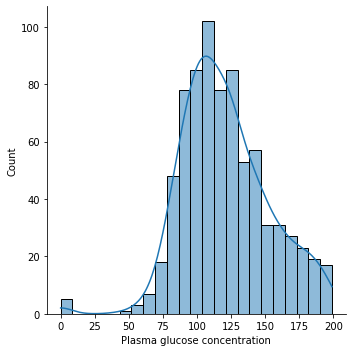

In [ ]:
import seaborn as sns

sns.displot(df_pima['Plasma glucose concentration'],kde=True)

Since, the data is normally distributed, we'll use the mean to compute the glucose missing values, for the rows that have 0 `2-Hour serium insulin` as well.

In [ ]:
df_pima.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
BMI                             0
 Diabetes pedigree function     0
Age                             0
Class variable                  0
dtype: int64

In [ ]:
#impute the mean of the column Plasma glucose concentration 
#fill in the zeros with NaNs then with the mean.
df_pima.loc[(df_pima['2-Hour serum insulin'] ==0) & (df_pima['Plasma glucose concentration'] ==0), ['Plasma glucose concentration']] = np.nan 
df_pima['Plasma glucose concentration'] = df_pima['Plasma glucose concentration'].fillna(df_pima['Plasma glucose concentration'].mean())

Remember, there was another row which had a `Plasma glucose concentration` of `0`, but a `2-Hour insulin` of `23`. The proposed approach here is to find the other rows with this concentration, and use the mean of their Plasma glucose level to fill in that row.

In [ ]:
df_pima[df_pima['Plasma glucose concentration']==0] 

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
182,1,0.0,74,20,23,27.7,0.299,21,0


The 2-hour serium insulin turns out to be 23. Let's find the rows with 23 2-Hour Serum Insulin and get their average glucose level. But before that, we will replace the value we want to impute with a NaN

In [ ]:
df_pima.loc[(df_pima['Plasma glucose concentration'] ==0), ['Plasma glucose concentration']] = np.nan #replace the value we want to impute with NaN

two_hour_serum_mean =df_pima[df_pima['2-Hour serum insulin']==23]['Plasma glucose concentration'].mean() #get the mean of the glucode where the 2-hour serum = 23
df_pima['Plasma glucose concentration'] = df_pima['Plasma glucose concentration'].fillna(two_hour_serum_mean)#fill the NaN value with that mean

Now, we'll try to impute the diastolic blood pressure

In [ ]:
df_pima[df_pima['Diastolic blood pressure'] ==0]#get the rows where the glucose concentration is 0

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


Let's try to plot the diastolic blood pressure values to see if they are normally distributed or not.

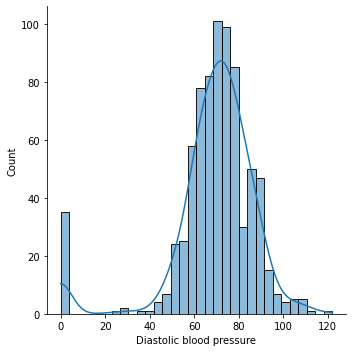

In [ ]:
sns.displot(df_pima['Diastolic blood pressure'],kde=True)

The graph isn't perfectly normally distributed, but we can consider it normally distributed and impute the values using the mean.

In [ ]:
#fill the zeros in the column Diastolic blood pressure with NaNs 

df_pima.loc[(df_pima['Diastolic blood pressure'] ==0), ['Diastolic blood pressure']] = np.nan 
df_pima['Diastolic blood pressure'] = df_pima['Diastolic blood pressure'].fillna(df_pima['Diastolic blood pressure'].mean())

In [ ]:
df_pima['Diastolic blood pressure'].isnull().sum()

0

**Side Note:** Instead of assigning NaN to each and every zero value in every column using `loc`, we can simply use `df_pima.mask(df_pima==0)`. This will fill any 0 value in the dataframe with `NaN`. However, make sure you keep the zeros in the columns that should accept zeros, such as number of times pregnant, after applyinhg the mask.

The same should be done for the `Triceps skinfold thickness`. Start by plotting and then choosing the method of imputation.


In [ ]:
df_pima[df_pima['Triceps skinfold thickness']==0]#get the rows where the Triceps skinfold thickness is 0

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
2,8,183.0,64.000000,0,0,23.3,0.672,32,1
5,5,116.0,74.000000,0,0,25.6,0.201,30,0
7,10,115.0,72.405184,0,0,35.3,0.134,29,0
9,8,125.0,96.000000,0,0,0.0,0.232,54,1
10,4,110.0,92.000000,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.000000,0,0,36.3,0.258,52,1
758,1,106.0,76.000000,0,0,37.5,0.197,26,0
759,6,190.0,92.000000,0,0,35.5,0.278,66,1
762,9,89.0,62.000000,0,0,22.5,0.142,33,0


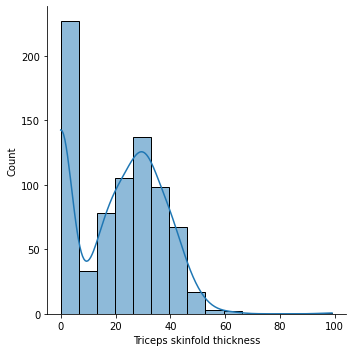

In [ ]:
sns.displot(df_pima['Triceps skinfold thickness'], kde= True)

Since the graph is not normally distributed, let's use the median to compute the missing values.

In [ ]:
df_pima.loc[(df_pima['Triceps skinfold thickness']==0),['Triceps skinfold thickness']] = np.nan #set the 0 values to NaN
df_pima['Triceps skinfold thickness'] = df_pima['Triceps skinfold thickness'].fillna(df_pima['Triceps skinfold thickness'].median()) #replace the NaN values with the median

In [ ]:
df_pima['Triceps skinfold thickness'].isnull().sum()

0

For the `2-Hour Serum`, let's plot the values to see the method we are going to use for imputation.

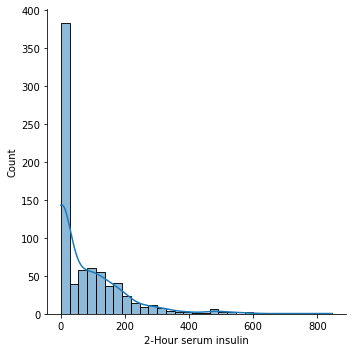

In [ ]:
sns.displot(df_pima['2-Hour serum insulin'],kde=True)

Since the graph is skewed, we will use the median to compute the missing values.

In [ ]:
df_pima.loc[(df_pima['2-Hour serum insulin']==0),['2-Hour serum insulin']] = np.nan #set the 0 values to NaN
df_pima['2-Hour serum insulin'] = df_pima['2-Hour serum insulin'].fillna(df_pima['2-Hour serum insulin'].median()) #replace the NaN values with the median

Finally, let's impute the BMI missing values. However, let's make the imputation dependent on the number of times pregnant. 

In [ ]:
df_pima[df_pima['BMI'] ==0]#get the rows where the BMI is 0

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable
9,8,125.0,96.000000,29.0,125.0,0.0,0.232,54,1
49,7,105.0,72.405184,29.0,125.0,0.0,0.305,24,0
60,2,84.0,72.405184,29.0,125.0,0.0,0.304,21,0
81,2,74.0,72.405184,29.0,125.0,0.0,0.102,22,0
145,0,102.0,75.000000,23.0,125.0,0.0,0.572,21,0
371,0,118.0,64.000000,23.0,89.0,0.0,1.731,21,0
426,0,94.0,72.405184,29.0,125.0,0.0,0.256,25,0
494,3,80.0,72.405184,29.0,125.0,0.0,0.174,22,0
522,6,114.0,72.405184,29.0,125.0,0.0,0.189,26,0
684,5,136.0,82.000000,29.0,125.0,0.0,0.640,69,0


In [ ]:
#fill the 0 BMIs with NaNs
df_pima.loc[(df_pima['BMI']==0),['BMI']] = np.nan #set the 0 values to NaN

In [ ]:
df_pima.isnull().sum()

Number of times pregnant         0
Plasma glucose concentration     0
Diastolic blood pressure         0
Triceps skinfold thickness       0
2-Hour serum insulin             0
BMI                             11
 Diabetes pedigree function      0
Age                              0
Class variable                   0
dtype: int64

In [ ]:
df_pima.groupby('Number of times pregnant')['BMI'].median()

Number of times pregnant
0     34.75
1     30.10
2     30.50
3     31.10
4     32.00
5     33.85
6     30.80
7     33.05
8     32.70
9     32.15
10    32.40
11    36.60
12    30.00
13    35.40
14    35.10
15    37.10
17    40.90
Name: BMI, dtype: float64

In [ ]:
df_pima['BMI'] = df_pima.groupby('Number of times pregnant')['BMI'].apply(lambda x: x.fillna(x.median()))#get the BMI median of the people with the same number of pregnancy as the person with the missing BMI

In [ ]:
df_pima.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
BMI                             0
 Diabetes pedigree function     0
Age                             0
Class variable                  0
dtype: int64

In [ ]:
df_pima[df_pima['BMI'].isnull()]#get the rows where the BMI is NaN

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes pedigree function,Age,Class variable


As observed above, we no longer have null BMIs

In [ ]:
#save the dataframe in a csv

df_pima.to_csv('df_pima_cleaned')